# Modelo predictivo - Resultado final del expediente

##1. Librerias

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt

##2.Carga del dataset (limpio)

In [ ]:
uploaded = files.upload()

Saving Dataset_vialidad_limpio.csv to Dataset_vialidad_limpio.csv


In [ ]:
df = pd.read_csv('Dataset_vialidad_limpio.csv')
df.head()

,Estado,ID_Expediente,Clasificacion_Norma,Fecha_Inicio,Caratula,Estado_Actual,Prioridad_Expediente,Riesgo_Financiero,Abogado_Asignado,Instancia_Actual,...,Resultado_Final,Cantidad_de_Partes,Monto_Reclamado,Monto_Resuelto,Tipo_Demandante,Dias_en_Etapa,Juzgado,Caratula.1,Abogado_Contraparte,Tiene_Audiencia
0,EN TRÁMITE,476369,Norma Civil,2005-04-07 13:43:36,Expediente 0,FERIA JUDICIAL,Baja,Alto,Belén,Primera Instancia,...,Desfavorable,6,1734442.13,1.223088e+06,Persona Física,1591,COMERCIAL 1,Caso relacionado 0,DR. PAREDES,1
1,EN TRÁMITE,478544,Norma Penal,2007-05-19 14:45:07,Expediente 1,APELADO,Alta,Bajo,Andres,Segunda Instancia,...,Conciliación,2,44841.49,1.888469e+06,Persona Física,769,PAZ TERCERA,Caso relacionado 1,DR. URQUIZA,1
2,APELADO,442962,Norma Comercial,2003-04-15 23:00:51,Expediente 2,FERIA JUDICIAL,Alta,Alto,Belén,Primera Instancia,...,Desfavorable,5,2023370.04,5.206396e+05,Persona Física,1125,LABORAL 5,Caso relacionado 2,DR. PAREDES,1
3,TERMINADO,366847,Norma Civil,2000-09-16 23:10:13,Expediente 3,TERMINADO,Baja,Alto,Andres,Primera Instancia,...,Favorable,7,1181424.56,1.194948e+06,Empresa,1222,PAZ TERCERA,Caso relacionado 3,DR. PAREDES,1
4,TERMINADO,820488,Norma Laboral,2013-05-05 23:34:01,Expediente 4,TERMINADO,Baja,Bajo,Belén,Corte Suprema,...,Desfavorable,4,4096157.66,3.121292e+06,Empresa,813,COMERCIAL 1,Caso relacionado 4,DR. PAREDES,1


##3.Definicion de variables

In [ ]:
# Variable objetivo
y = df['Resultado_Final']

# Columnas que se van a excluir
columnas_excluir = [
    'Resultado_Final',
    'ID_Expediente',
    'Caratula',
    'Caratula.1'
]

# columnas_excluir.append('Nombre_de_columna_auxiliar')

X = df.drop(columns=columnas_excluir)

X.head()


,Estado,Clasificacion_Norma,Fecha_Inicio,Estado_Actual,Prioridad_Expediente,Riesgo_Financiero,Abogado_Asignado,Instancia_Actual,Audiencia_Prevista,Cantidad_de_Partes,Monto_Reclamado,Monto_Resuelto,Tipo_Demandante,Dias_en_Etapa,Juzgado,Abogado_Contraparte,Tiene_Audiencia
0,EN TRÁMITE,Norma Civil,2005-04-07 13:43:36,FERIA JUDICIAL,Baja,Alto,Belén,Primera Instancia,2027-09-29 22:12:19,6,1734442.13,1.223088e+06,Persona Física,1591,COMERCIAL 1,DR. PAREDES,1
1,EN TRÁMITE,Norma Penal,2007-05-19 14:45:07,APELADO,Alta,Bajo,Andres,Segunda Instancia,2030-07-25 16:49:44,2,44841.49,1.888469e+06,Persona Física,769,PAZ TERCERA,DR. URQUIZA,1
2,APELADO,Norma Comercial,2003-04-15 23:00:51,FERIA JUDICIAL,Alta,Alto,Belén,Primera Instancia,2028-03-08 12:51:30,5,2023370.04,5.206396e+05,Persona Física,1125,LABORAL 5,DR. PAREDES,1
3,TERMINADO,Norma Civil,2000-09-16 23:10:13,TERMINADO,Baja,Alto,Andres,Primera Instancia,2029-07-14 15:43:00,7,1181424.56,1.194948e+06,Empresa,1222,PAZ TERCERA,DR. PAREDES,1
4,TERMINADO,Norma Laboral,2013-05-05 23:34:01,TERMINADO,Baja,Bajo,Belén,Corte Suprema,2026-01-30 01:03:51,4,4096157.66,3.121292e+06,Empresa,813,COMERCIAL 1,DR. PAREDES,1


In [ ]:
#Separación de variables numéricas y categóricas

columnas_numericas = [
    'Cantidad_de_Partes',
    'Monto_Reclamado',
    'Monto_Resuelto',
    'Dias_en_Etapa'
]

if 'Tiene_Audiencia' in X.columns:
    columnas_numericas.append('Tiene_Audiencia')

columnas_categoricas = [col for col in X.columns if col not in columnas_numericas]

print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)


Columnas numéricas: ['Cantidad_de_Partes', 'Monto_Reclamado', 'Monto_Resuelto', 'Dias_en_Etapa', 'Tiene_Audiencia']
Columnas categóricas: ['Estado', 'Clasificacion_Norma', 'Fecha_Inicio', 'Estado_Actual', 'Prioridad_Expediente', 'Riesgo_Financiero', 'Abogado_Asignado', 'Instancia_Actual', 'Audiencia_Prevista', 'Tipo_Demandante', 'Juzgado', 'Abogado_Contraparte']


##Codificamos variables

In [ ]:
le = LabelEncoder()

# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

In [ ]:
y = le.fit_transform(y.astype(str))

In [ ]:
le.fit(df['Resultado_Final'])

dict(zip(le.transform(le.classes_), le.classes_))


{np.int64(0): 'Conciliación',
 np.int64(1): 'Desfavorable',
 np.int64(2): 'En Proceso',
 np.int64(3): 'Favorable'}

##4.Separacion de train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((1200, 17), (300, 17))

##5.Definicion del modelo

In [ ]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

##6.Train y predicciones

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

##7.Metricas

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.91

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        82
           1       0.94      0.94      0.94        78
           2       0.96      0.83      0.89        65
           3       0.87      0.89      0.88        75

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



##8.Matriz de confusion

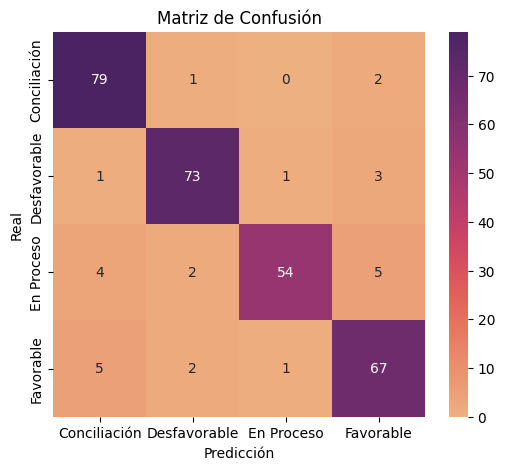

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='flare',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

##9. Curvas ROC

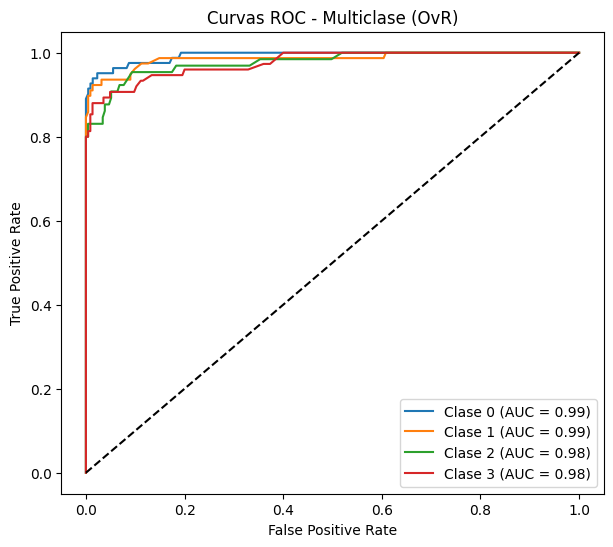

In [ ]:
# Binarizar las clases para ROC multiclase
y_test_bin = label_binarize(y_test, classes=le.transform(le.classes_))
n_classes = y_test_bin.shape[1]

# Predecir probabilidades
y_score = clf.predict_proba(X_test)

# Calcular FPR, TPR y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar
plt.figure(figsize=(7, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC - Multiclase (OvR)')
plt.legend()
plt.show()

##10.Feature importance

/tmp/ipython-input-3771163550.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df.head(15), x='Importance', y='Feature', palette='viridis')


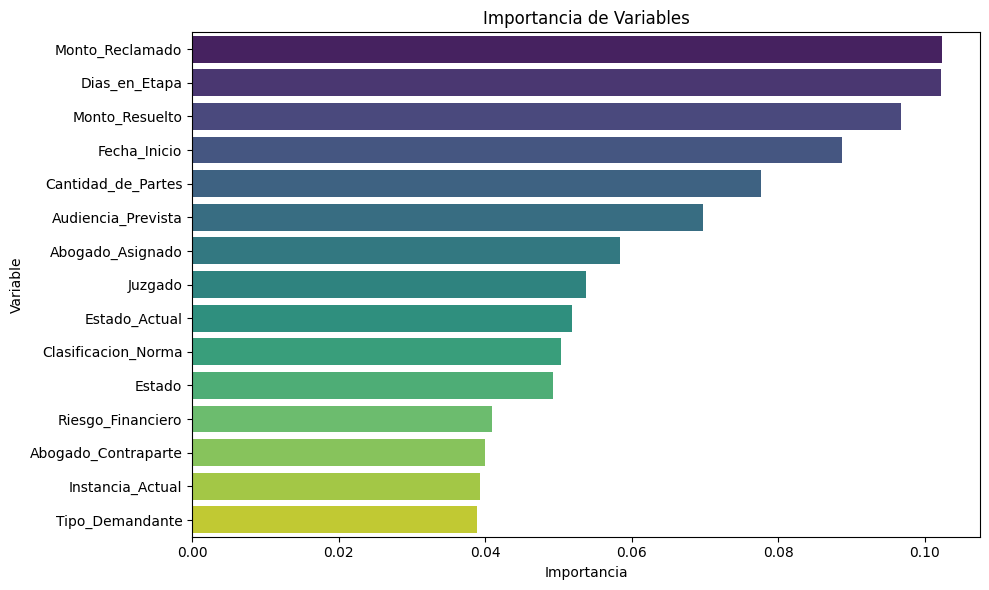

In [ ]:
importances = clf.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Importancia de Variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
